# Análise exploratória de dados

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
%matplotlib inline

## 1. Descrição dos dados

### 1.1 Coleta de dados

In [23]:
df = pd.read_csv('../data/raw/CarsData.csv')
df.to_csv('../data/raw/CarsData.csv', index=False)

In [24]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

In [25]:
dicionario_cars = pd.DataFrame([
    {
        'variavel': 'model',
        'descricao': 'O modelo do carro.',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },{
        'variavel': 'year',
        'descricao': 'O ano de fabricação do carro.',
        'tipo': 'quantitativa',
        'subtipo': 'discreta'
    },{
        'variavel': 'price',
        'descricao': 'O preço do carro.',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'transmission',
        'descricao': 'O tipo de transmissão usada no carro.',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },{
        'variavel': 'mileage',
        'descricao': 'A quilometragem do carro.',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'fuelType',
        'descricao': 'O tipo de combustível usado pelo carro.',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },{
        'variavel': 'tax',
        'descricao': 'A taxa de imposto aplicável ao carro.',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'mpg',
        'descricao': 'A eficiência em milhas por galão do carro.',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'engineSize',
        'descricao': 'O tamanho do motor do carro.',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'Manufacturer',
        'descricao': 'O fabricante do carro.',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    }
])

dicionario_cars

,variavel,descricao,tipo,subtipo
0,model,O modelo do carro.,qualitativa,nominal
1,year,O ano de fabricação do carro.,quantitativa,discreta
2,price,O preço do carro.,quantitativa,continua
3,transmission,O tipo de transmissão usada no carro.,qualitativa,nominal
4,mileage,A quilometragem do carro.,quantitativa,continua
5,fuelType,O tipo de combustível usado pelo carro.,qualitativa,nominal
6,tax,A taxa de imposto aplicável ao carro.,quantitativa,continua
7,mpg,A eficiência em milhas por galão do carro.,quantitativa,continua
8,engineSize,O tamanho do motor do carro.,quantitativa,continua
9,Manufacturer,O fabricante do carro.,qualitativa,nominal


In [26]:
dicionario_cars.to_csv('../data/external/DictionaryCars.csv', index=False)

## 2. Perguntas de partida e hipóteses

### 2.1 Predição de preços para os próximos 2 anos

### 2.2 Custo benefício baseado em algumas variáveis. (Modelos/Quilometragem(MPG)/Imposto/Preço)

### 2.3 Análise sobre a preferência do tipo de combustível com o passar dos anos.

### 2.4 Relação de preço por marca. Marca de carros mais baratos/ Carros mais caros.

### 2.5 Preferência por transmissão do veículo.

### 2.6 Relação do tamanho do motor com o tipo de combustível

### 2.7 Relação do tamanho motor com MPG

### 2.8 Relação da taxa de imposto com o ano de fabricação do carro

#####  **Existe alguma relação entre preço e marca?**

    Vamos verificar se a marca de carros pode determinar se o carro é mais barato ou mais caro.
    
    As marcas são: Hyundi, Volkswagen, BMW, Skoda, Ford, Toyota, Mercedes, Vauxhall e Audi.

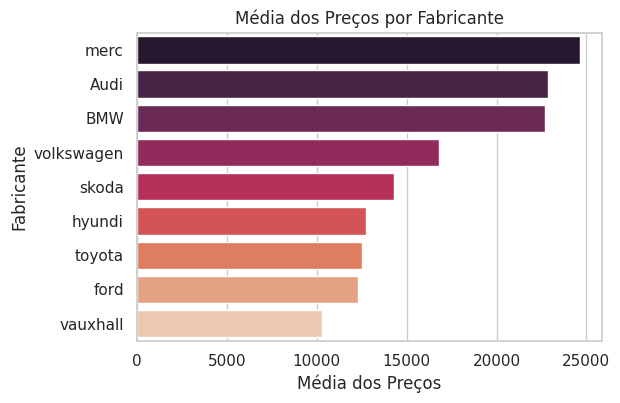

In [27]:
mean_prices = df.groupby('Manufacturer')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
palette = sns.color_palette("rocket", len(mean_prices))
sns.barplot(x=mean_prices.values, y=mean_prices.index, palette=palette)
plt.xlabel('Média dos Preços')
plt.ylabel('Fabricante')
plt.title('Média dos Preços por Fabricante')
plt.show()

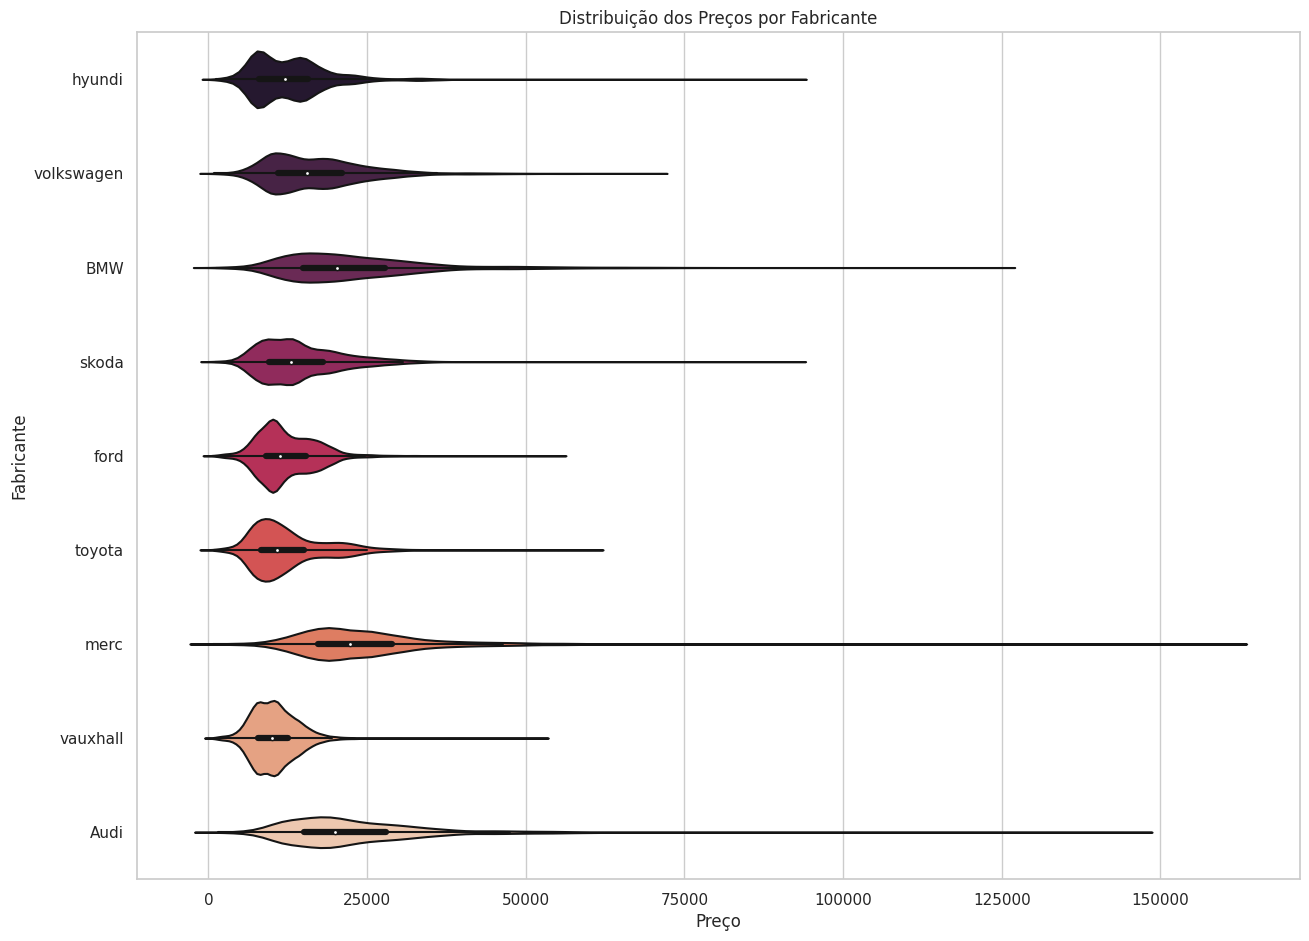

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 11))
sns.violinplot(data=df, x="price", y="Manufacturer", palette="rocket")
plt.xlabel('Preço')
plt.ylabel('Fabricante')
plt.title('Distribuição dos Preços por Fabricante')
plt.show()

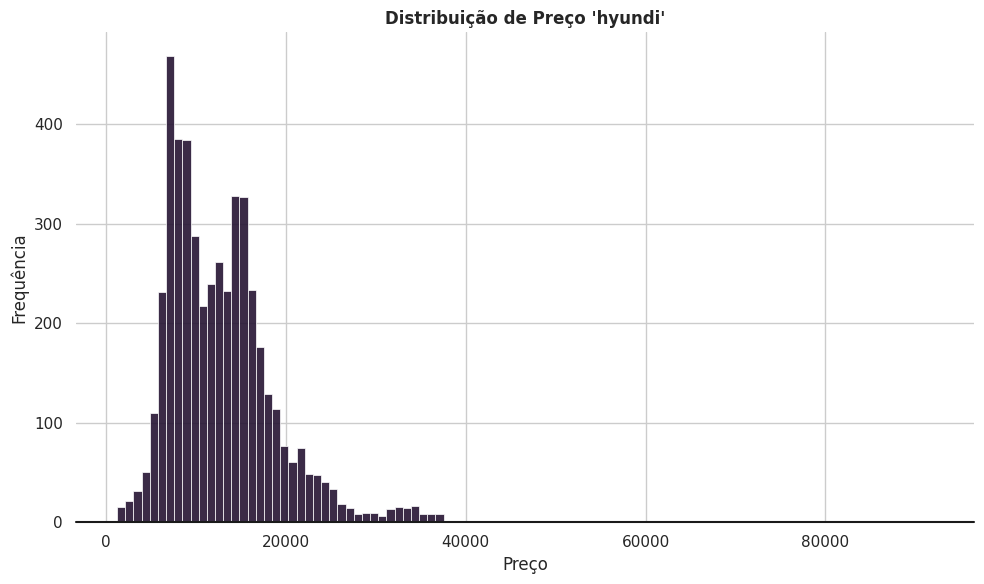

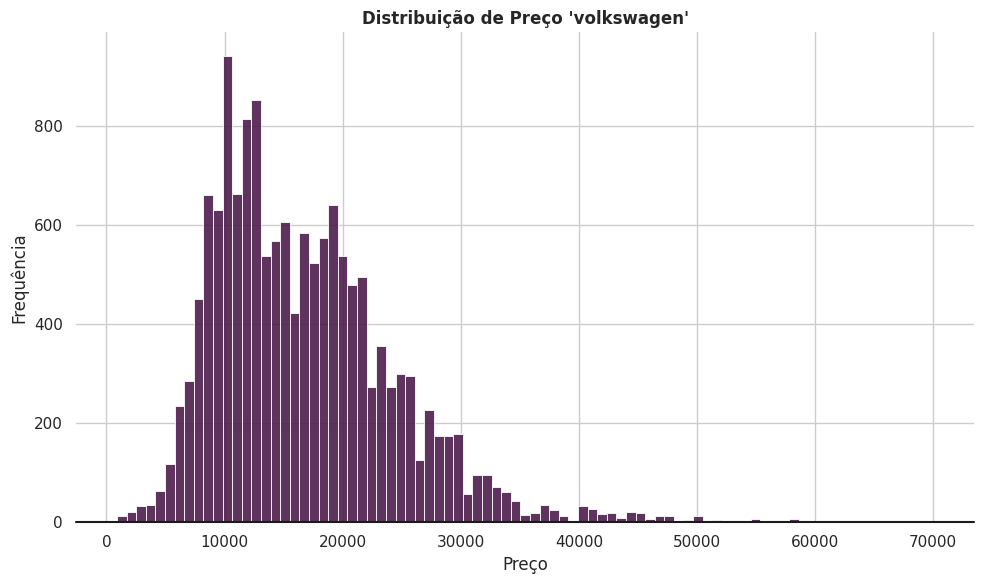

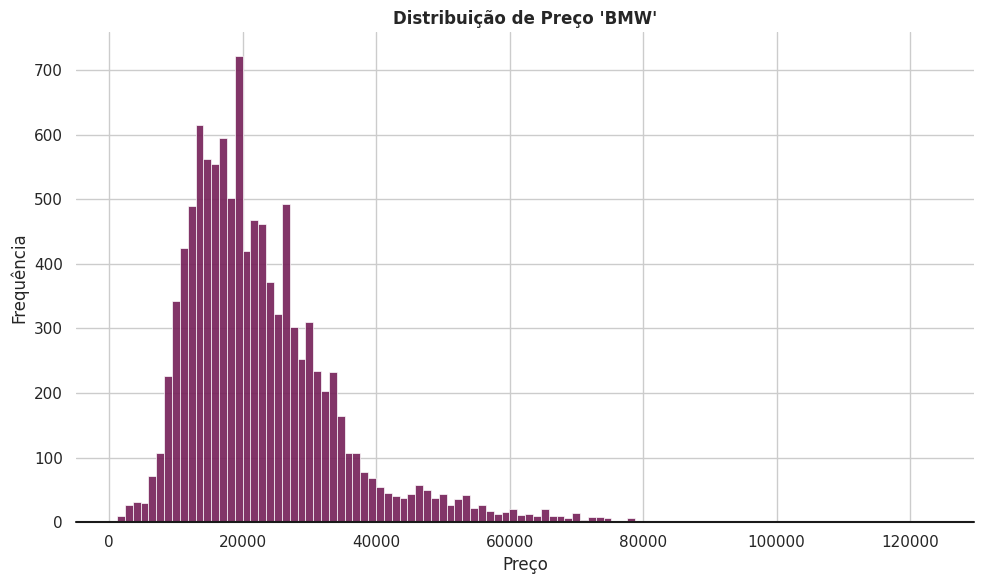

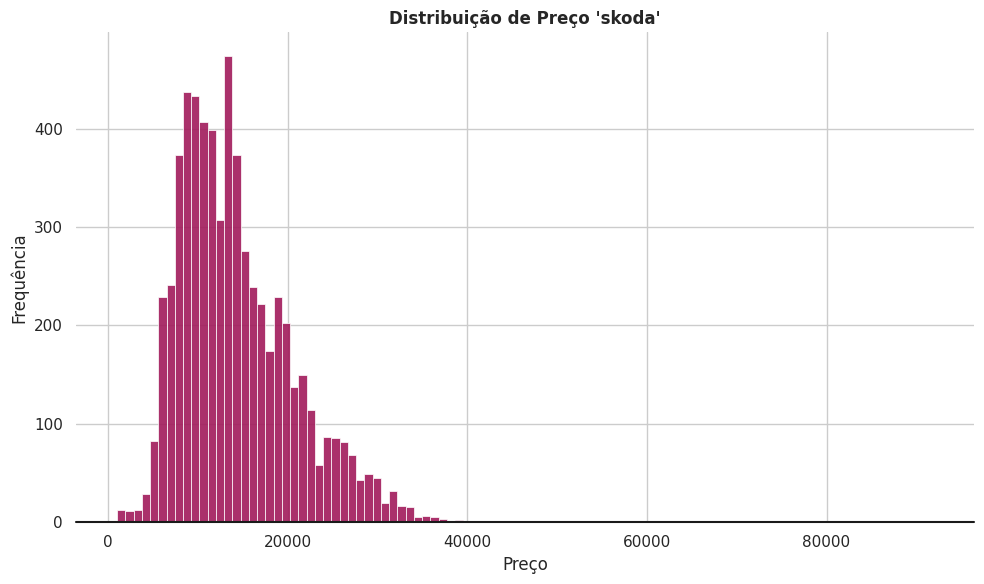

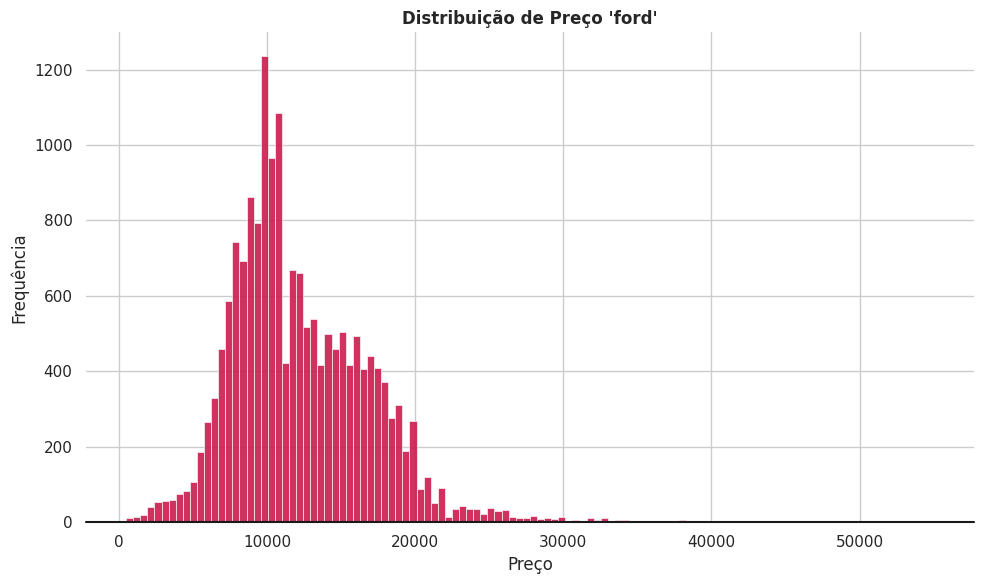

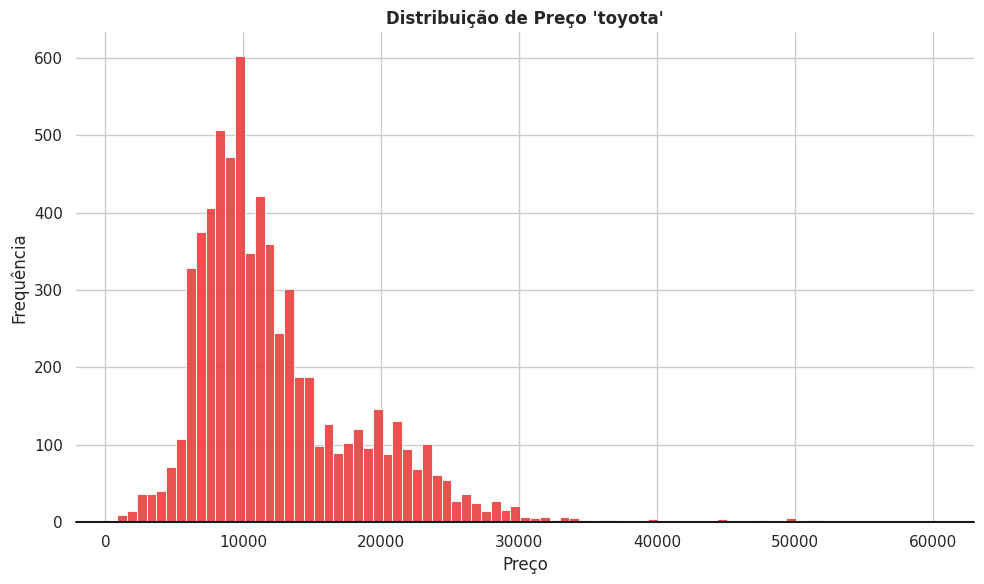

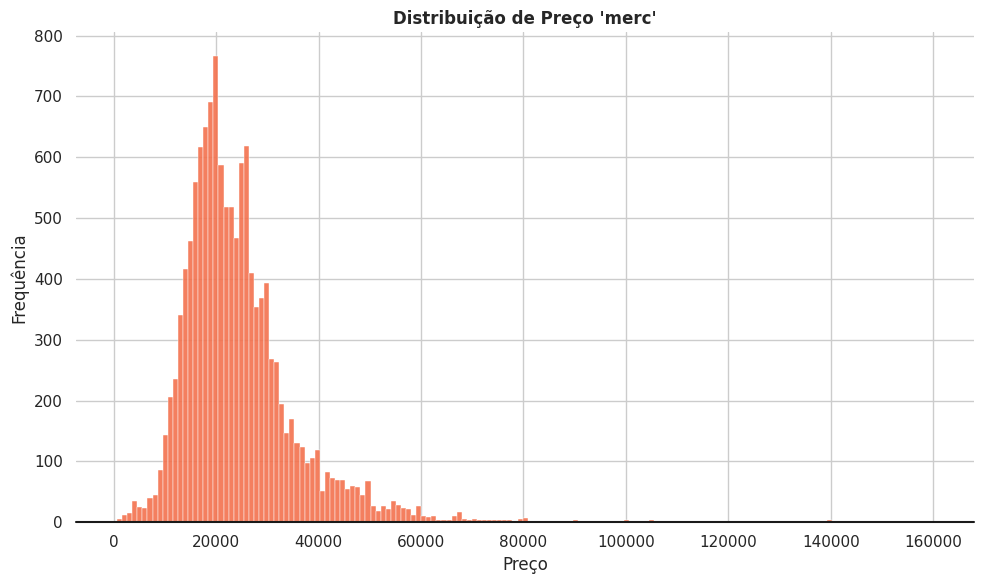

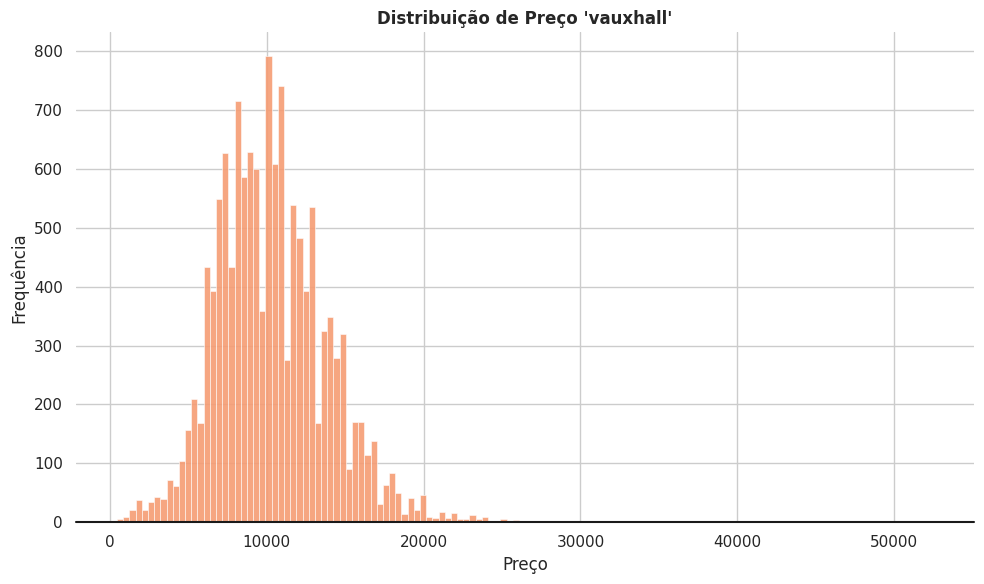

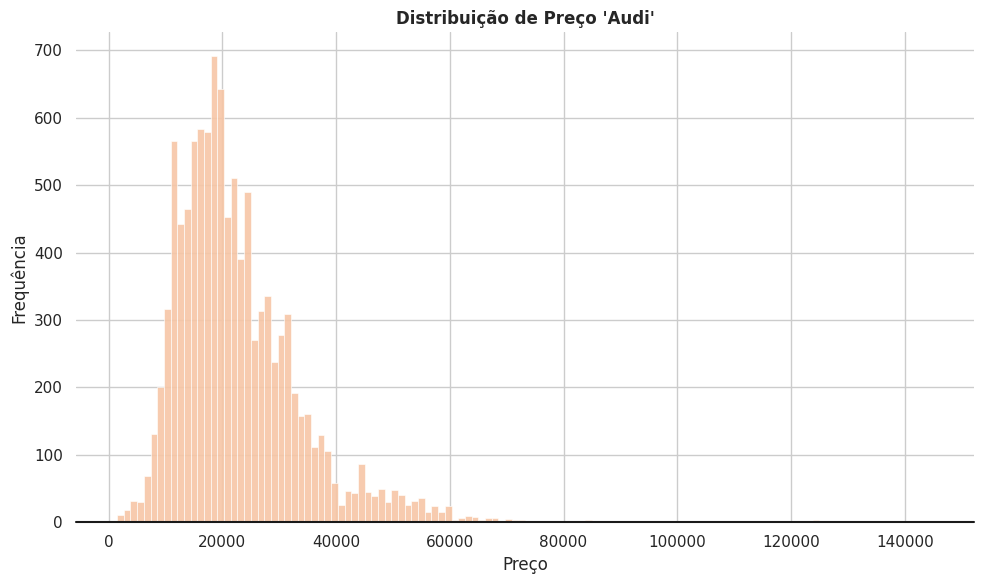

In [29]:
colors = sns.color_palette("rocket", df['Manufacturer'].nunique())

for i, manufacturer in enumerate(df['Manufacturer'].unique()):
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=df[df['Manufacturer'] == manufacturer],
        x='price',
        color=colors[i % len(colors)],
        alpha=0.9)
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição de Preço '{manufacturer}'", fontweight='bold')
    ax.set_xlabel('Preço')
    ax.set_ylabel('Frequência')
    ax.grid(axis='y', linestyle='-')
    plt.tight_layout()
    plt.show()

* O carro de maior valor desta base de dados é uma Mercedes.Aproximadamente 140.000
* Carros da marca Mercedes são em média mais caros.
* A relação entre marca e preço não parece muito significativa. Outros fatores devem ser levandos em conta para se chegar a uma conclusão. 

#####  **Qual a relação do tamanho do motor com o tipo de combustível?**

    Vamos verificar se o tipo do motor interfere no tipo de combustível
    
    Os tipos de combustível são: Híbrido, Petróleo, Disel, Elétrico e Outros

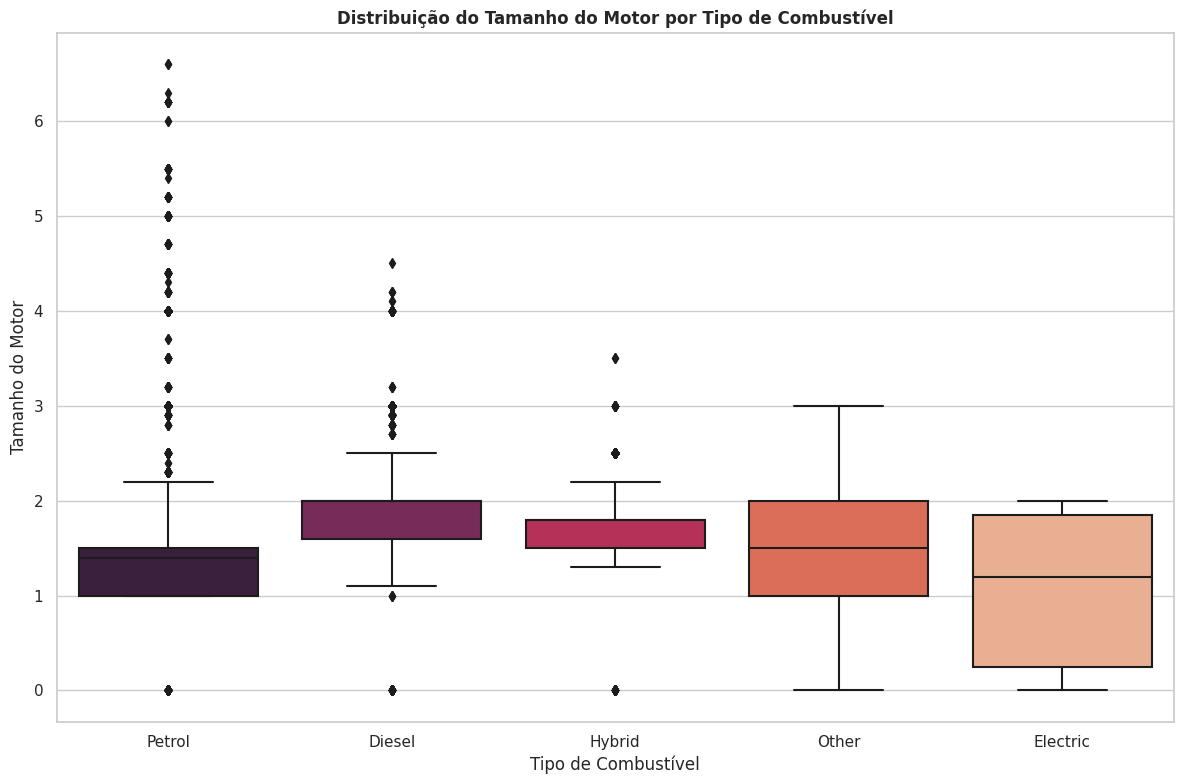

In [64]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=df,
    x='fuelType',
    y='engineSize',
    palette=sns.color_palette("rocket", df['fuelType'].nunique())
)

# Definir detalhes adicionais do gráfico
ax.set_title('Distribuição do Tamanho do Motor por Tipo de Combustível', fontweight='bold')
ax.set_xlabel('Tipo de Combustível')
ax.set_ylabel('Tamanho do Motor')
plt.tight_layout()
plt.show()

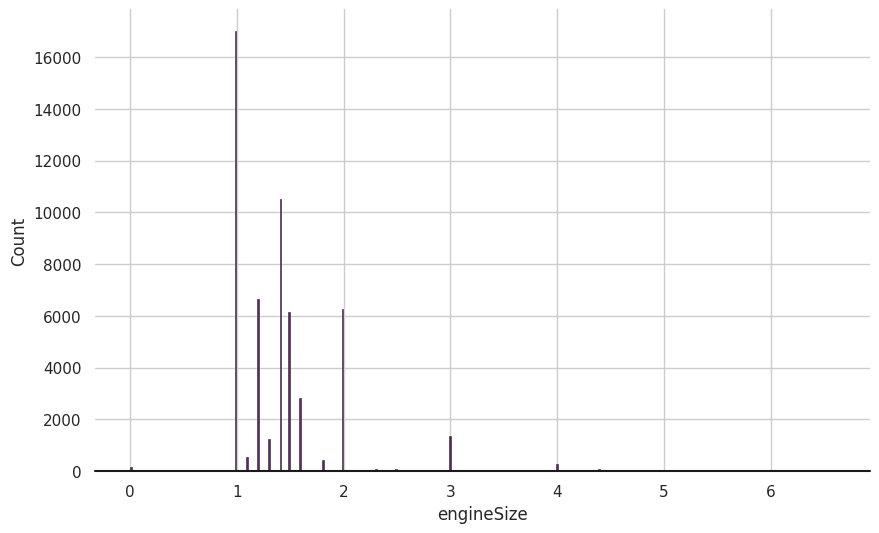

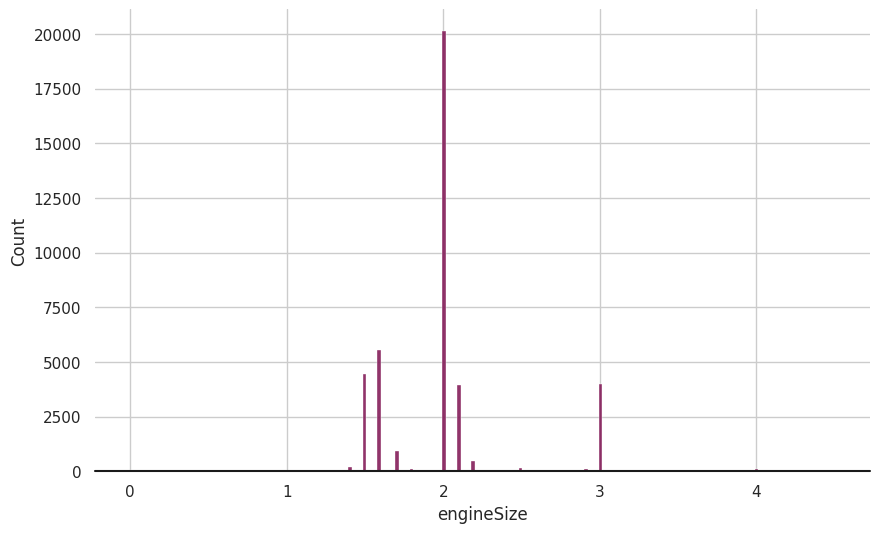

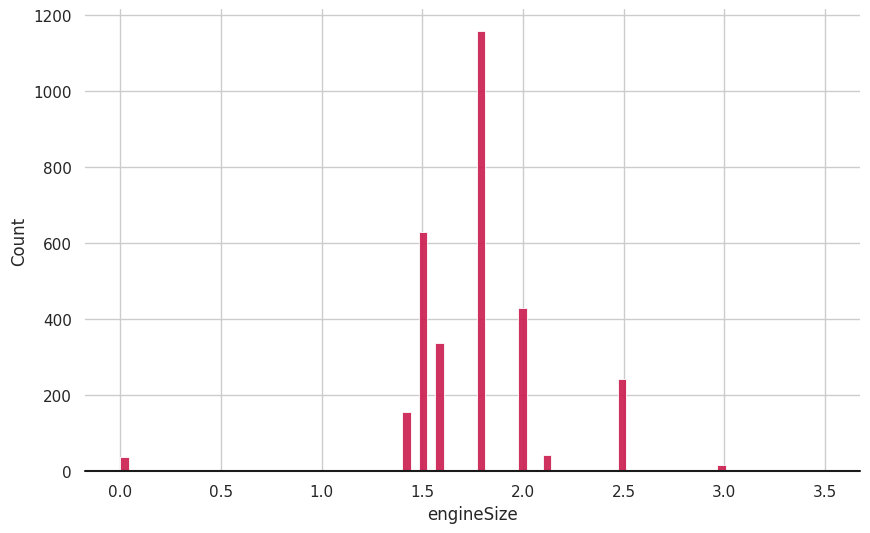

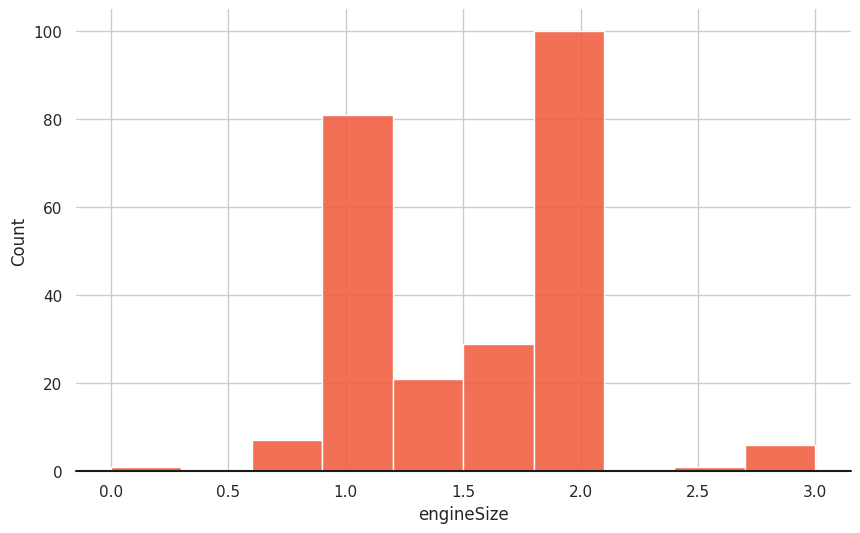

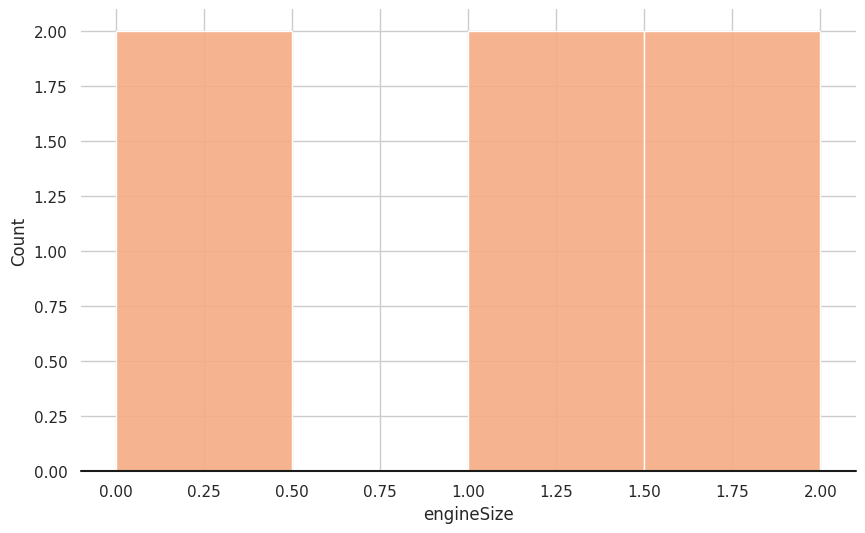

In [62]:
colors = sns.color_palette("rocket", df['fuelType'].nunique())

for i, fuelType in enumerate(df['fuelType'].unique()):
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=df[df['fuelType'] == fuelType],
        x='engineSize',
        color=colors[i % len(colors)],
        alpha=0.9)
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    plt.show()

## 3. Insights